In [18]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv') # Loaded thr CSV file

In [20]:
# Removed the description column as it is providing contribution in analysis
# as of now
df.drop(columns=['description'],inplace=True) 

In [21]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


In [22]:
df.shape #( 8807 Rows and 11 column)

(8807, 11)

In [23]:
df.info()

'''we have least null values in release_year,rating, and duration '''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


'we have least null values in release_year,rating, and duration '

In [24]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


#### Missing value deduction and fill

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [26]:
np.any(df['duration'].isna()) 
# missing values in duraion column

True

In [27]:
''' To get the rows with missing duraion values'''
df.loc[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies


as we can say the values are in rating so we will copy these null values of 
duraion column from rating and fill the rating column with NaN values

In [28]:
df['duration'].fillna(df['rating'],inplace=True)
df.loc[[5541,5794,5813],'rating']=np.nan

In [29]:
# we will check the ratings of tvshows and movies
pd.crosstab(df['type'],df['rating'])

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
type,,,,,,,,,,,,,,
Movie,41,3,75,287,490,797,1427,126,2062,540,131,139,5,3
TV Show,0,0,5,0,0,2,733,94,1145,323,176,195,1,0


most of the tv show are rated are TV-MA Rating so we
will fill all the null values with 'TV-MA'

In [30]:
df['rating'].fillna('TV-MA',inplace=True)

In [31]:
df['rating'].isna().sum()

0

In [32]:
# conversion of date in Datetime object

df['date_added']=pd.to_datetime(df['date_added'])

## Now we have filled all column having least null values We will proceed furthur for analysis 

### Total number of TV Show or Movies produced ?

In [33]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

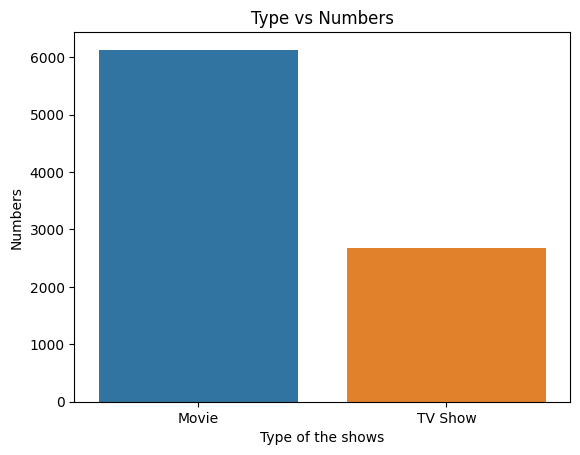

In [34]:
# no of movies and tv show produced

sns.countplot(x=df['type'])
plt.xlabel('Type of the shows')
plt.ylabel('Numbers')
plt.title('Type vs Numbers')
plt.show()

> **insight 1 = According to this dataset 6131 nos movies and 2676 no of TV shows are available on netflix**

### which cast is best suited for movies or TV Show ?

In [35]:
cast_movie=df[['type','cast']] # extracted the cast and type column 

In [36]:
cast_movie['cast']=cast_movie['cast'].str.split(', ') # Unesting of cast column
cast_movie=cast_movie.explode('cast')
cast_movie

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14684\2640959829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast_movie['cast']=cast_movie['cast'].str.split(', ') # Unesting of cast column


,type,cast
0,Movie,NaN
1,TV Show,Ama Qamata
1,TV Show,Khosi Ngema
1,TV Show,Gail Mabalane
1,TV Show,Thabang Molaba
...,...,...
8806,Movie,Manish Chaudhary
8806,Movie,Meghna Malik
8806,Movie,Malkeet Rauni
8806,Movie,Anita Shabdish


In [37]:
top_cast_movie=pd.crosstab(cast_movie['cast'],cast_movie['type']).sort_values(by='Movie',ascending=False).reset_index().head(20).sort_values('Movie')
top_cast_movie # top 20 most popular cast

type,cast,Movie,TV Show
19,John Cleese,19,5
17,Nicolas Cage,20,1
16,Adam Sandler,20,0
15,Kay Kay Menon,20,1
14,Salman Khan,20,0
18,Nawazuddin Siddiqui,20,1
13,Rajesh Kava,21,5
12,Ajay Devgn,21,0
11,Samuel L. Jackson,22,2
10,Kareena Kapoor,25,0


In [38]:
top_cast_movie['cast'].values

array(['John Cleese', 'Nicolas Cage', 'Adam Sandler', 'Kay Kay Menon',
       'Salman Khan', 'Nawazuddin Siddiqui', 'Rajesh Kava', 'Ajay Devgn',
       'Samuel L. Jackson', 'Kareena Kapoor', 'Rupa Bhimani',
       'Boman Irani', 'Amitabh Bachchan', 'Julie Tejwani', 'Paresh Rawal',
       'Akshay Kumar', 'Om Puri', 'Naseeruddin Shah', 'Shah Rukh Khan',
       'Anupam Kher'], dtype=object)

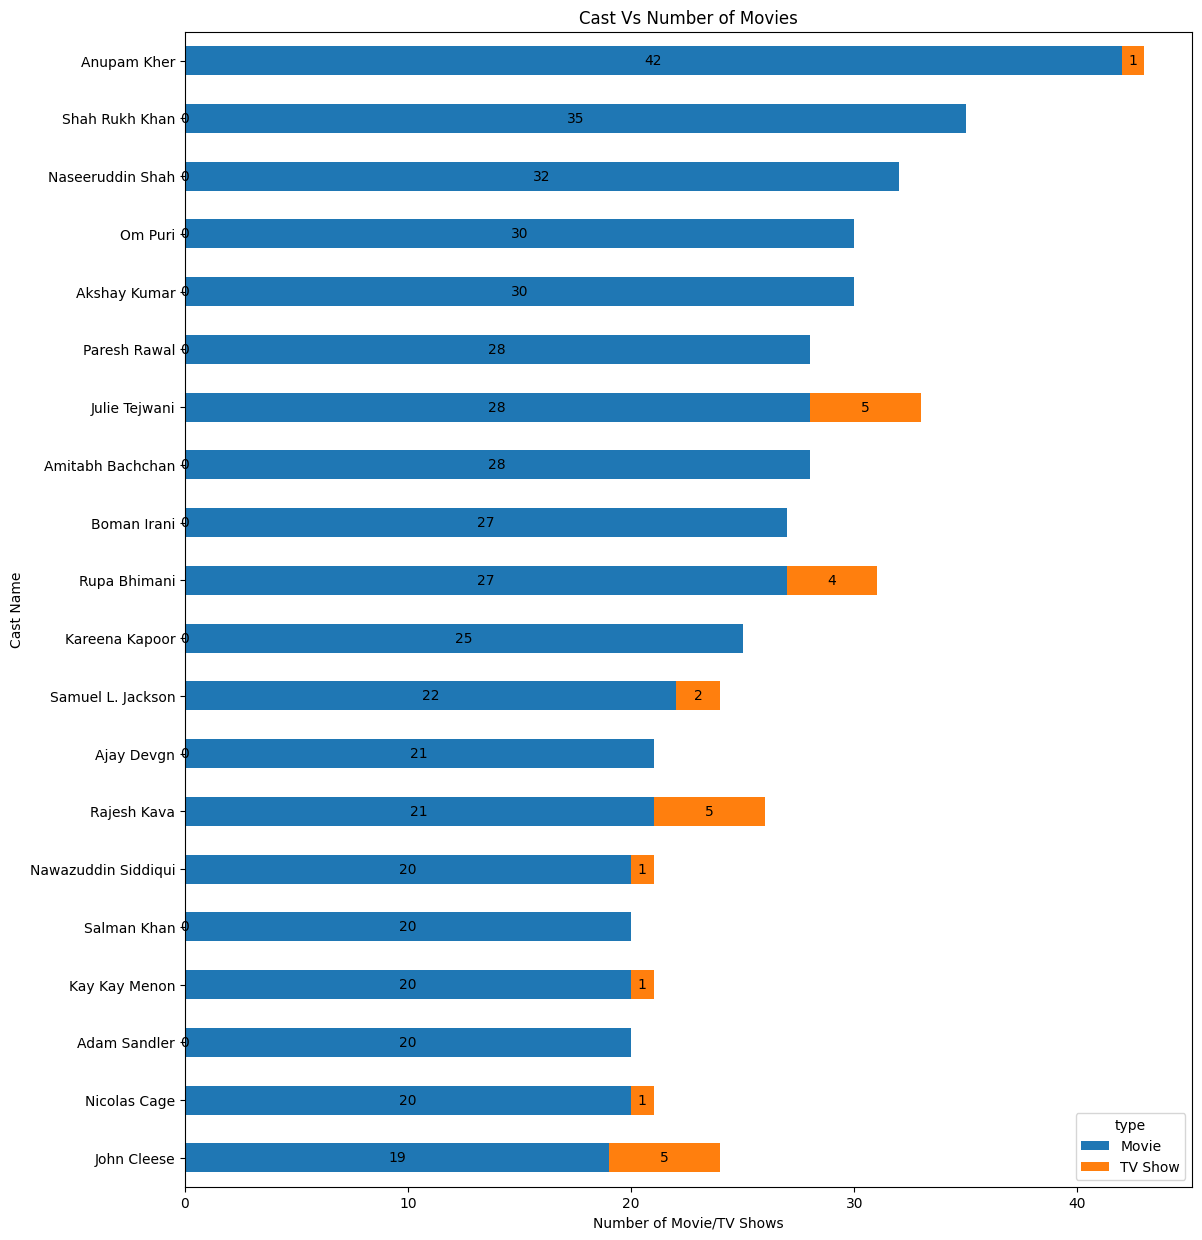

In [39]:
ax1=top_cast_movie.plot(kind='barh',stacked=True,x='cast',figsize=(13,15))
for c in ax1.containers:
    ax1.bar_label(c, label_type='center')
plt.xlabel('Number of Movie/TV Shows')
plt.ylabel('Cast Name')
plt.title('Cast Vs Number of Movies')
plt.show()

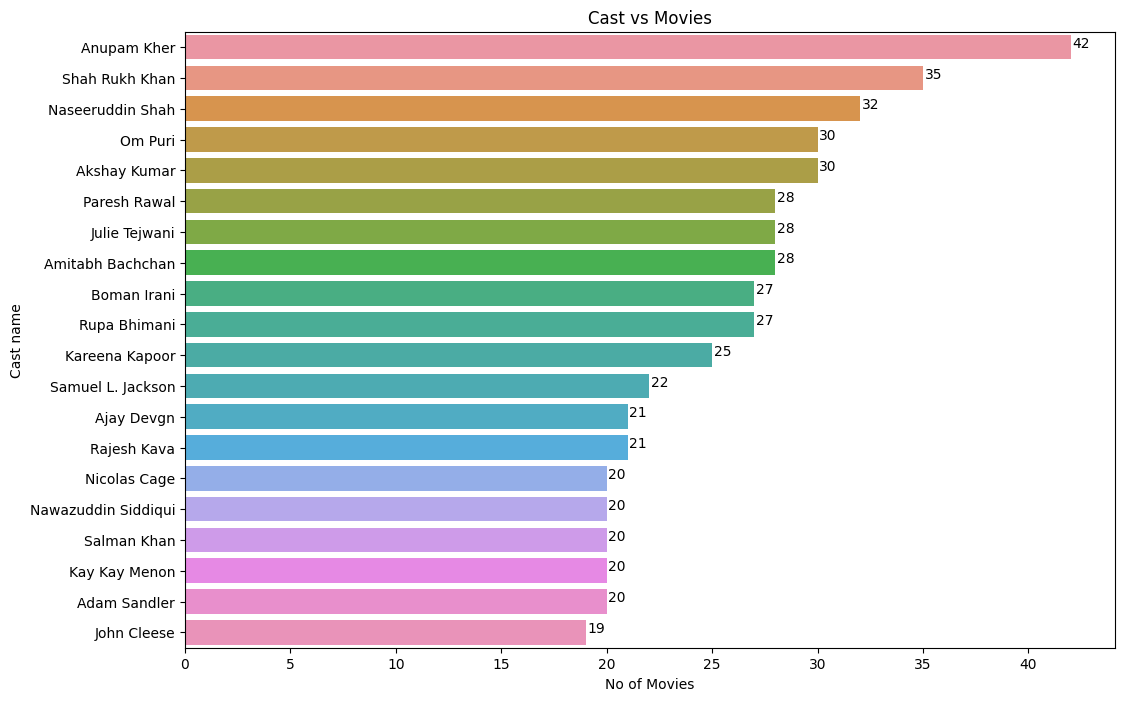

In [40]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(y=i, x=y[i]+0.5, s=y[i], ha = 'center')
figure=plt.figure(figsize=(12,8))
sns.barplot(data=top_cast_movie.sort_values('Movie',ascending=False),y='cast',x='Movie')
plt.xlabel("No of Movies")
plt.ylabel("Cast name")
plt.title('Cast vs Movies')
addlabels(top_cast_movie['cast'],top_cast_movie['Movie'])
plt.show()

> **insight= out of 20 top cast member for movies, 16 are From INDIA
>  ,so A movie from india casting these actors considerd to added on netflix**

In [41]:
top_cast_tvshow=pd.crosstab(cast_movie['cast'],cast_movie['type']).sort_values(by='TV Show',ascending=False).reset_index().head(20).sort_values(by='TV Show')
top_cast_tvshow

type,cast,Movie,TV Show
19,Sayaka Ohara,1,11
17,Natsuki Hanae,2,12
16,Nobuhiko Okamoto,0,12
15,Kenjiro Tsuda,2,12
18,Tomokazu Sugita,4,12
14,Vincent Tong,13,13
13,Mamoru Miyano,6,13
12,Takehito Koyasu,2,13
11,Kana Hanazawa,5,13
10,Yoshitsugu Matsuoka,1,13


In [42]:
top_cast_tvshow['cast'].values

array(['Sayaka Ohara', 'Natsuki Hanae', 'Nobuhiko Okamoto',
       'Kenjiro Tsuda', 'Tomokazu Sugita', 'Vincent Tong',
       'Mamoru Miyano', 'Takehito Koyasu', 'Kana Hanazawa',
       'Yoshitsugu Matsuoka', 'Hiroshi Kamiya', 'David Attenborough',
       'Yoshimasa Hosoya', 'Jun Fukuyama', 'Yuichi Nakamura', 'Ai Kayano',
       'Junichi Suwabe', 'Daisuke Ono', 'Yuki Kaji', 'Takahiro Sakurai'],
      dtype=object)

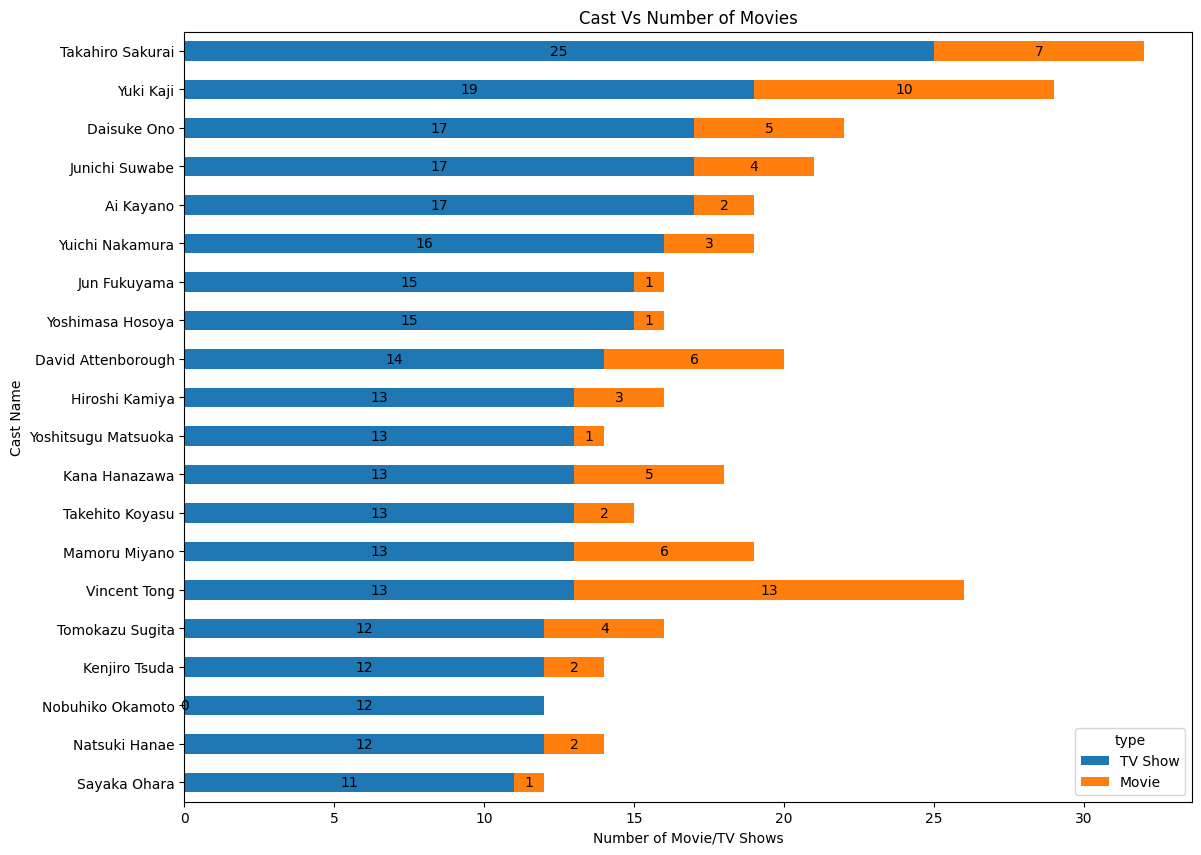

In [43]:
ax=top_cast_tvshow[['cast','TV Show','Movie']].plot(kind='barh',stacked=True,x='cast',figsize=(13,10))
for c in ax.containers:
    ax.bar_label(c, label_type='center')
plt.xlabel('Number of Movie/TV Shows')
plt.ylabel('Cast Name')
plt.title('Cast Vs Number of Movies')
plt.show()

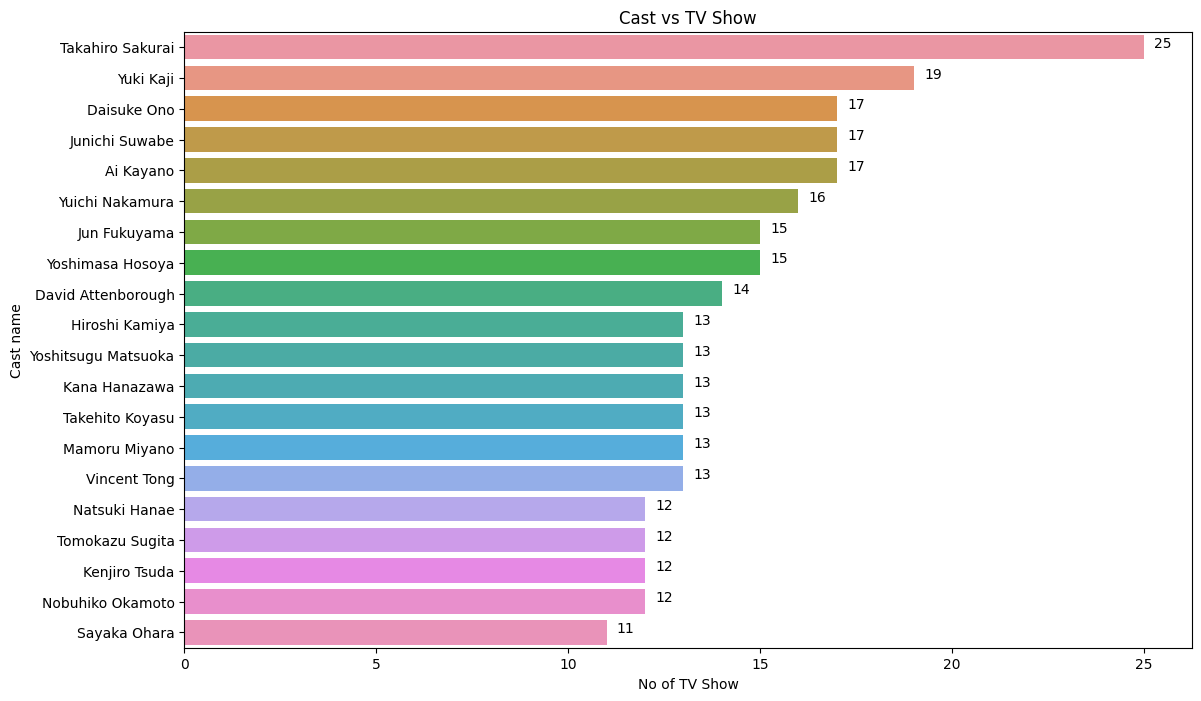

In [44]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(y=i, x=y[i]+0.5, s=y[i] , ha = 'center')
plt.figure(figsize=(13,8))
sns.barplot(data=top_cast_tvshow.sort_values('TV Show',ascending=False),y='cast',x='TV Show')
addlabels(top_cast_tvshow['cast'],top_cast_tvshow['TV Show'])
plt.xlabel("No of TV Show")
plt.ylabel("Cast name")
plt.title('Cast vs TV Show')
plt.show()

### Most Preferred Director for TV Show or Movies ?

In [45]:
type_director=df[['type','director']] # Extracted the columns for analyzation

In [46]:
np.any(type_director['director'].str.contains(', ')) # checking of the name column contains multiple names

True

In [47]:
type_director['director']=type_director['director'].str.split(', ') 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14684\2689433296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_director['director']=type_director['director'].str.split(', ')


In [48]:
type_director=type_director.explode('director')

In [49]:
top_movie_director=pd.crosstab(type_director['director'],type_director['type']).sort_values(by ='Movie',ascending=False).head(15).reset_index()
top_movie_director

type,director,Movie,TV Show
0,Rajiv Chilaka,22,0
1,Jan Suter,21,0
2,Raúl Campos,19,0
3,Suhas Kadav,16,0
4,Jay Karas,15,0
5,Marcus Raboy,15,1
6,Cathy Garcia-Molina,13,0
7,Martin Scorsese,12,0
8,Jay Chapman,12,0
9,Youssef Chahine,12,0


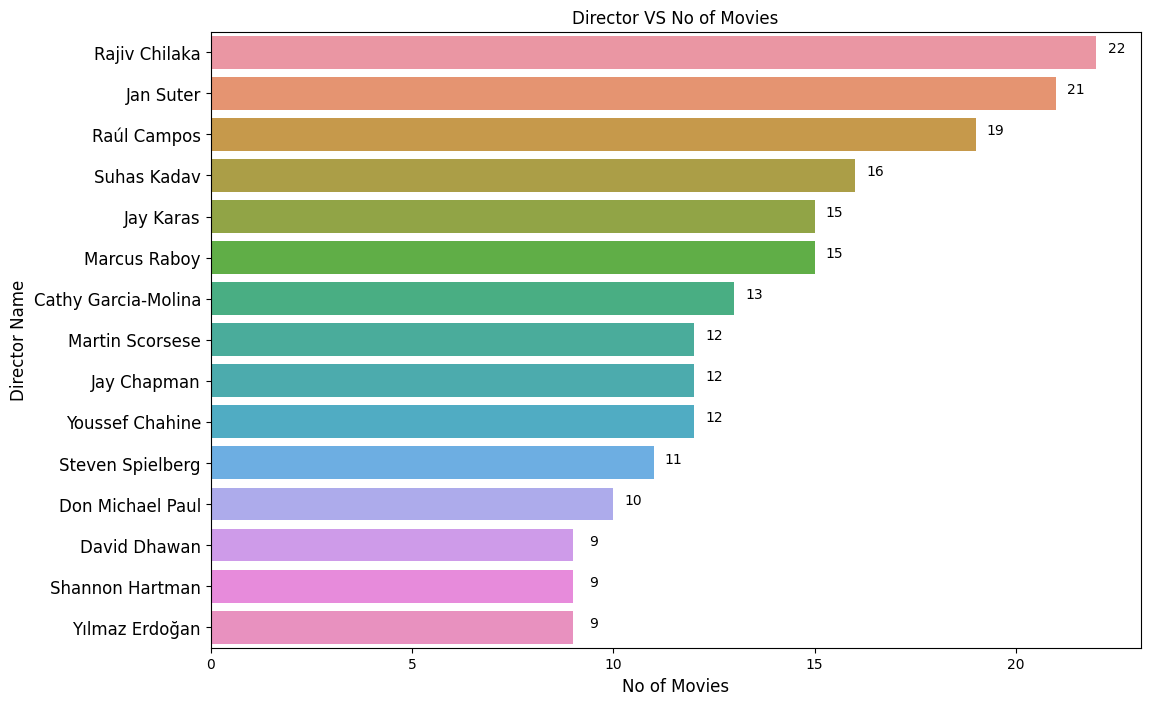

In [50]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(y=i, x=y[i]+0.5, s=y[i], ha = 'center')
plt.figure(figsize=(12,8))
sns.barplot(data=top_movie_director,y='director',x='Movie')
addlabels(top_movie_director['director'],top_movie_director['Movie'])
plt.xlabel('No of Movies',fontsize=12,)
plt.ylabel('Director Name',fontsize=12,)
plt.yticks(fontsize=12)
plt.title('Director VS No of Movies')
plt.show()

> **insight3= if a movie is in table movie is most likely to produce good views**

In [51]:
Top_tvshow_director=pd.crosstab(type_director['director'],type_director['type']).sort_values(by ='TV Show',ascending=False).head(20).reset_index()
Top_tvshow_director

type,director,Movie,TV Show
0,Alastair Fothergill,1,3
1,Ken Burns,2,3
2,Stan Lathan,2,2
3,Lynn Novick,0,2
4,Iginio Straffi,0,2
5,Jung-ah Im,0,2
6,Gautham Vasudev Menon,0,2
7,Hsu Fu-chun,0,2
8,Shin Won-ho,0,2
9,Joe Berlinger,3,2


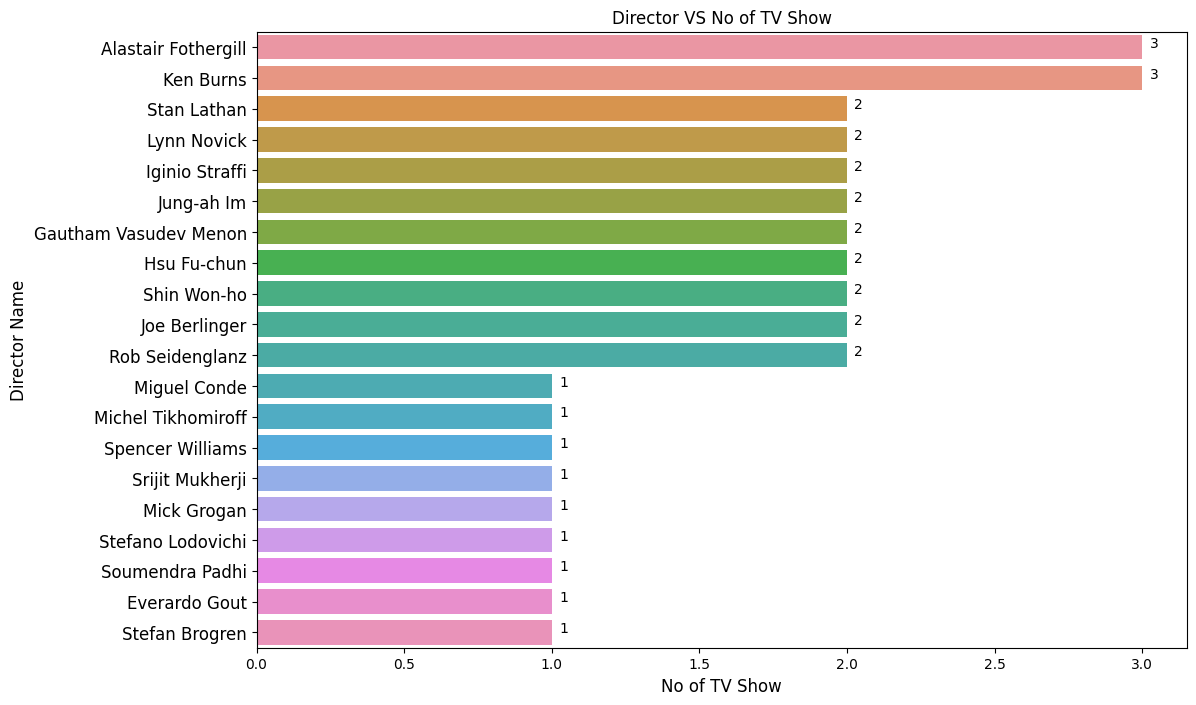

In [52]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(y=i, x=y[i]+0.04, s=y[i], ha = 'center')
plt.figure(figsize=(12,8))
sns.barplot(data=Top_tvshow_director,y='director',x='TV Show')
addlabels(Top_tvshow_director['director'],Top_tvshow_director['TV Show'])
plt.xlabel('No of TV Show',fontsize=12,)
plt.ylabel('Director Name',fontsize=12,)
plt.yticks(fontsize=12)
plt.title('Director VS No of TV Show')
plt.show()

> **insight4= if a Tv Show is in table movie is most likely to produce good views**

### Number of TV shows and movies added to any specific country ?

In [53]:
type_country=df[['type','country']]

In [54]:
np.any(type_country['country'].str.split(', '))
type_country['country']=type_country['country'].str.split(', ')
type_country=type_country.explode('country')
type_country

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14684\2108825989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_country['country']=type_country['country'].str.split(', ')


,type,country
0,Movie,United States
1,TV Show,South Africa
2,TV Show,NaN
3,TV Show,NaN
4,TV Show,India
...,...,...
8802,Movie,United States
8803,TV Show,NaN
8804,Movie,United States
8805,Movie,United States


In [55]:
print(type_country['country'].nunique())
type_country['country'].unique()

127


array(['United States', 'South Africa', nan, 'India', 'Ghana',
       'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia',
       'Czech Republic', 'Mexico', 'Turkey', 'Australia', 'France',
       'Finland', 'China', 'Canada', 'Japan', 'Nigeria', 'Spain',
       'Belgium', 'South Korea', 'Singapore', 'Italy', 'Romania',
       'Argentina', 'Venezuela', 'Hong Kong', 'Russia', '', 'Ireland',
       'Nepal', 'New Zealand', 'Brazil', 'Greece', 'Jordan', 'Colombia',
       'Switzerland', 'Israel', 'Taiwan', 'Bulgaria', 'Algeria', 'Poland',
       'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt', 'Denmark',
       'Kuwait', 'Netherlands', 'Malaysia', 'Vietnam', 'Hungary',
       'Sweden', 'Lebanon', 'Syria', 'Philippines', 'Iceland',
       'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria',
       'Cameroon', 'Palestine', 'Uruguay', 'United Kingdom,', 'Kenya',
       'Chile', 'Luxembourg', 'Cambodia', 'Bangladesh', 'Portugal',
       'Cayman Islands', 'Senegal', 'Serbia'

In [56]:
top_country_movie=pd.crosstab(type_country['country'],type_country['type']).sort_values(by ='Movie',ascending=False).reset_index().head(15)
top_country_movie['Movie_percentage']=round(top_country_movie['Movie']*100/6131,2)
top_country_movie

type,country,Movie,TV Show,Movie_percentage
0,United States,2751,938,44.87
1,India,962,84,15.69
2,United Kingdom,532,272,8.68
3,Canada,319,126,5.20
4,France,303,90,4.94
5,Germany,182,44,2.97
6,Spain,171,61,2.79
7,Japan,119,199,1.94
8,China,114,48,1.86
9,Mexico,111,58,1.81


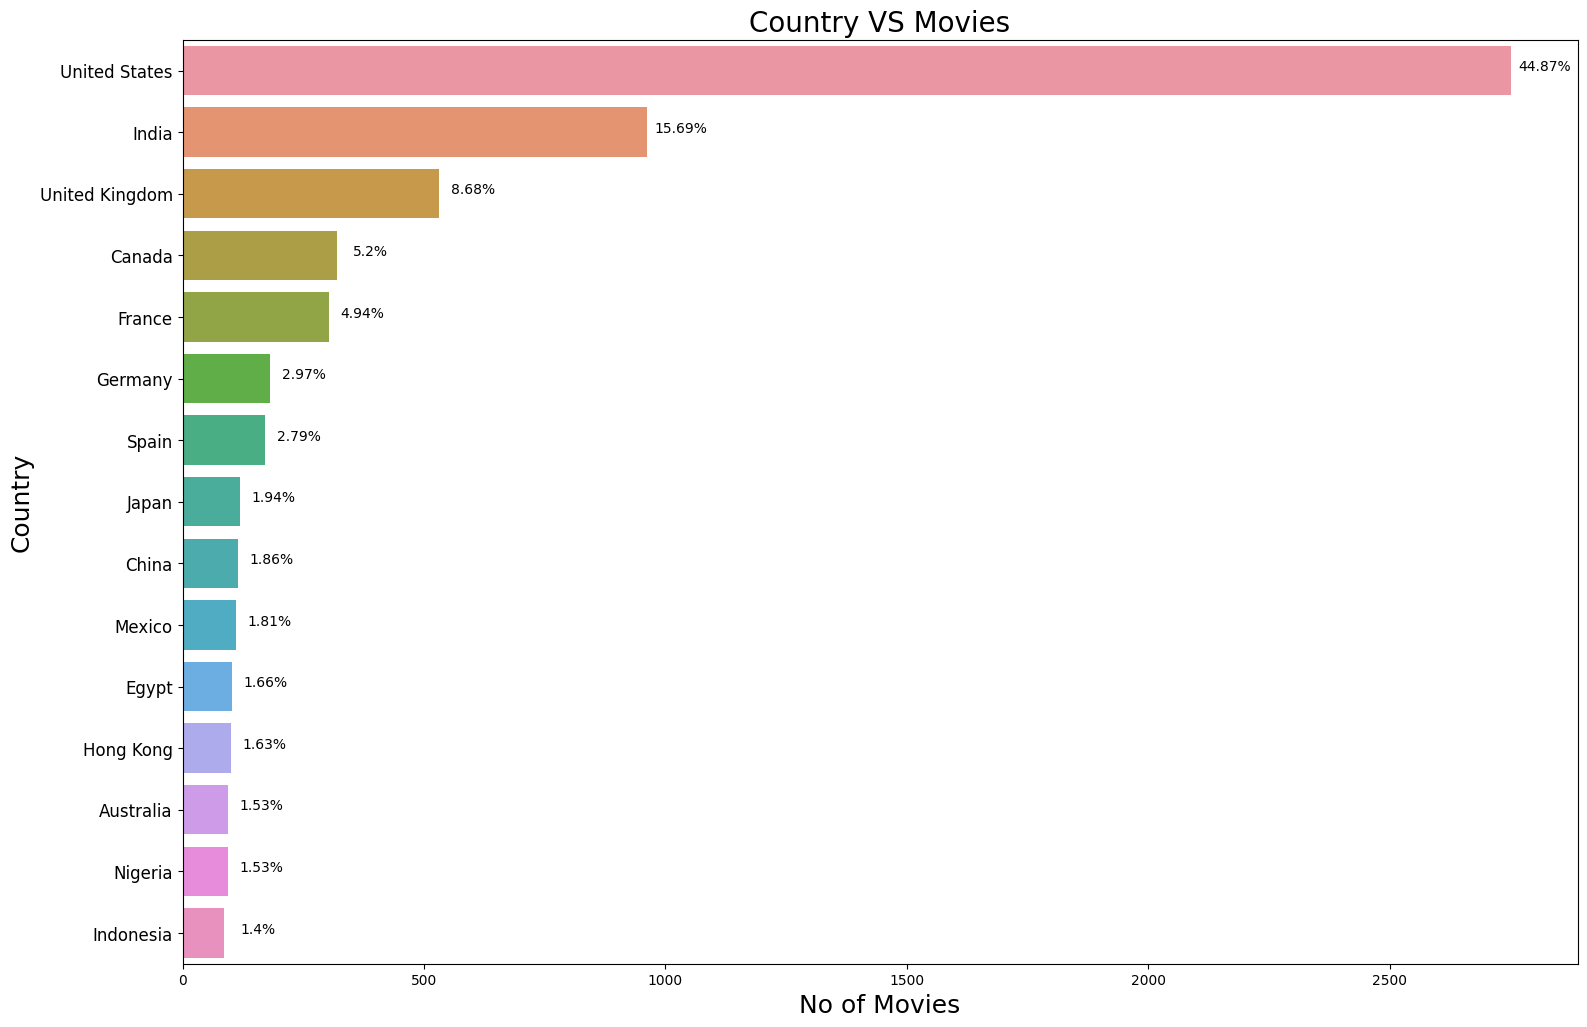

In [57]:
plt.figure(figsize=(18,12))
def addlabels(x,y,Z):
    for i in range(len(x)):
        plt.text(y=i, x=y[i]+70, s=f'{Z[i]}%', ha = 'center')
sns.barplot(data=top_country_movie,x="Movie",y='country')
addlabels(top_country_movie['country'],top_country_movie['Movie'],top_country_movie['Movie_percentage'])
plt.xlabel('No of Movies',fontsize=18)
plt.ylabel('Country',fontsize=18)
plt.yticks(fontsize=12)
plt.title('Country VS Movies',fontsize=20)
plt.show()

In [58]:
top_country_tvshow=pd.crosstab(type_country['country'],type_country['type']).sort_values(by ='TV Show',ascending=False).reset_index().head(15)
top_country_tvshow['tvshow_percentage']=round(top_country_tvshow['TV Show']*100/2676,2)
top_country_tvshow

type,country,Movie,TV Show,tvshow_percentage
0,United States,2751,938,35.05
1,United Kingdom,532,272,10.16
2,Japan,119,199,7.44
3,South Korea,61,170,6.35
4,Canada,319,126,4.71
5,France,303,90,3.36
6,India,962,84,3.14
7,Taiwan,19,70,2.62
8,Australia,94,66,2.47
9,Spain,171,61,2.28


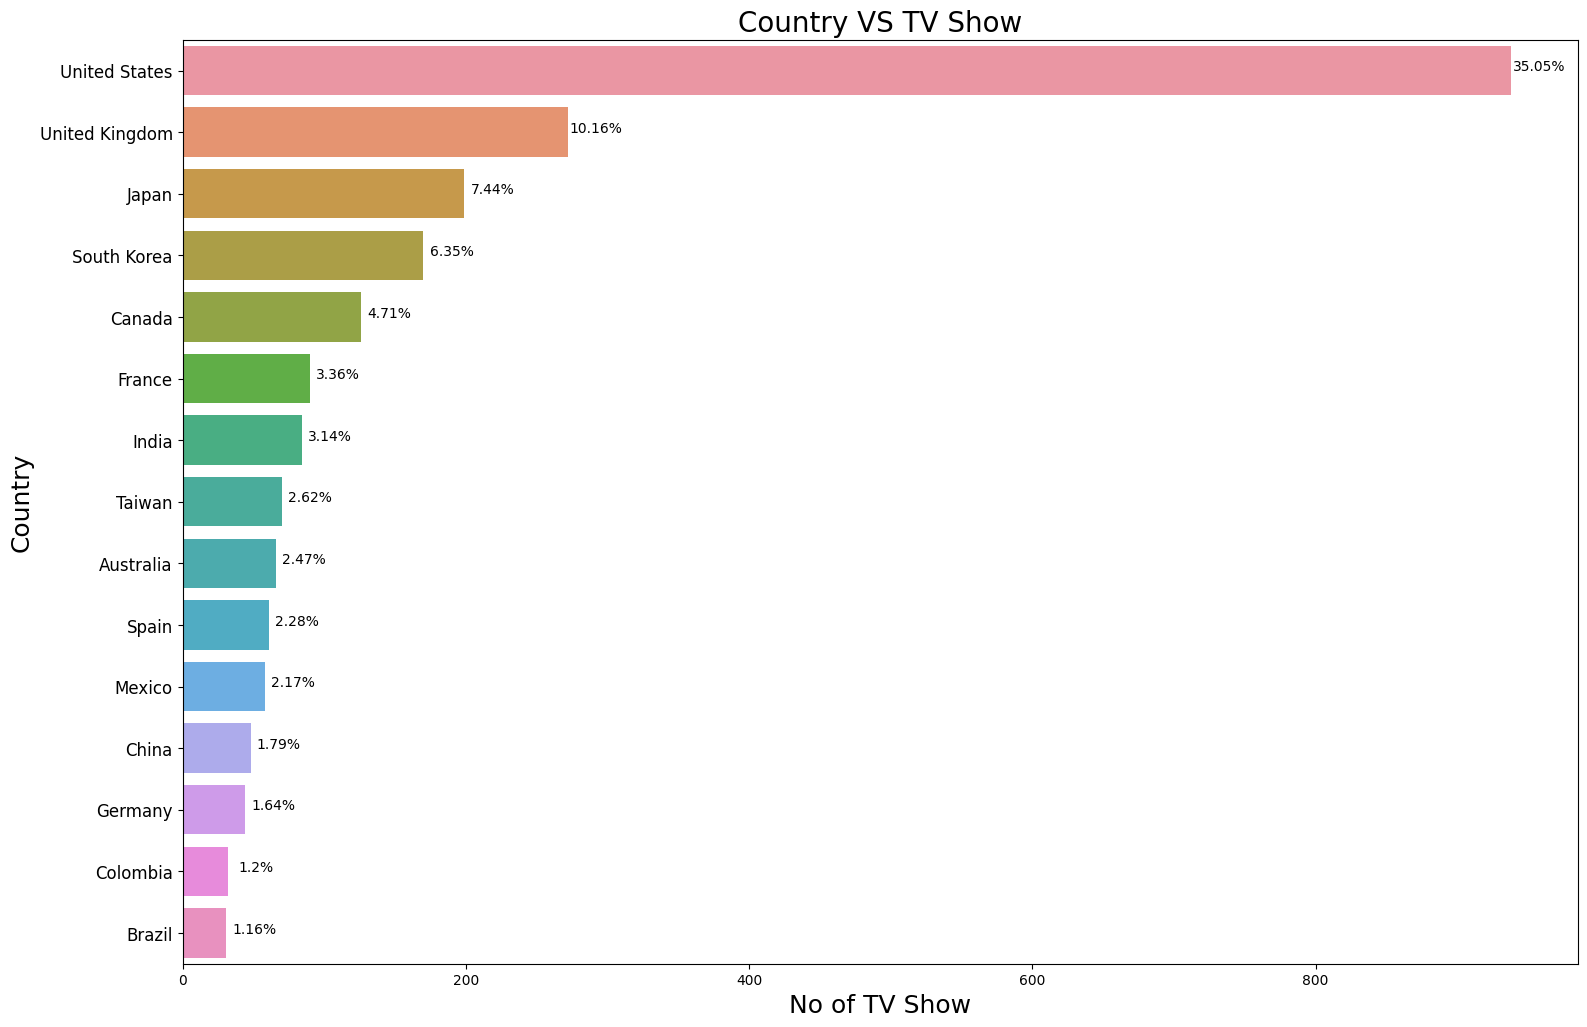

In [59]:
plt.figure(figsize=(18,12))
def addlabels(x,y,Z):
    for i in range(len(x)):
        plt.text(y=i, x=y[i]+20, s=f'{Z[i]}%', ha = 'center')
sns.barplot(data=top_country_tvshow,x="TV Show",y='country')
addlabels(top_country_tvshow['country'],top_country_tvshow['TV Show'],top_country_tvshow['tvshow_percentage'])
plt.xlabel('No of TV Show',fontsize=18)
plt.ylabel('Country',fontsize=18)
plt.yticks(fontsize=12)
plt.title('Country VS TV Show',fontsize=20)
plt.show()

> **INSIGHT3=Movies and TV shows released in UK,US,India,France,Canada,south Korea,Indonesia are liked by the users of the netflix**

In [60]:
tycont1=pd.crosstab(type_country['country'],type_country['type']).sort_values(by ='TV Show',ascending=False).reset_index().head(15)
tycont1

type,country,Movie,TV Show
0,United States,2751,938
1,United Kingdom,532,272
2,Japan,119,199
3,South Korea,61,170
4,Canada,319,126
5,France,303,90
6,India,962,84
7,Taiwan,19,70
8,Australia,94,66
9,Spain,171,61


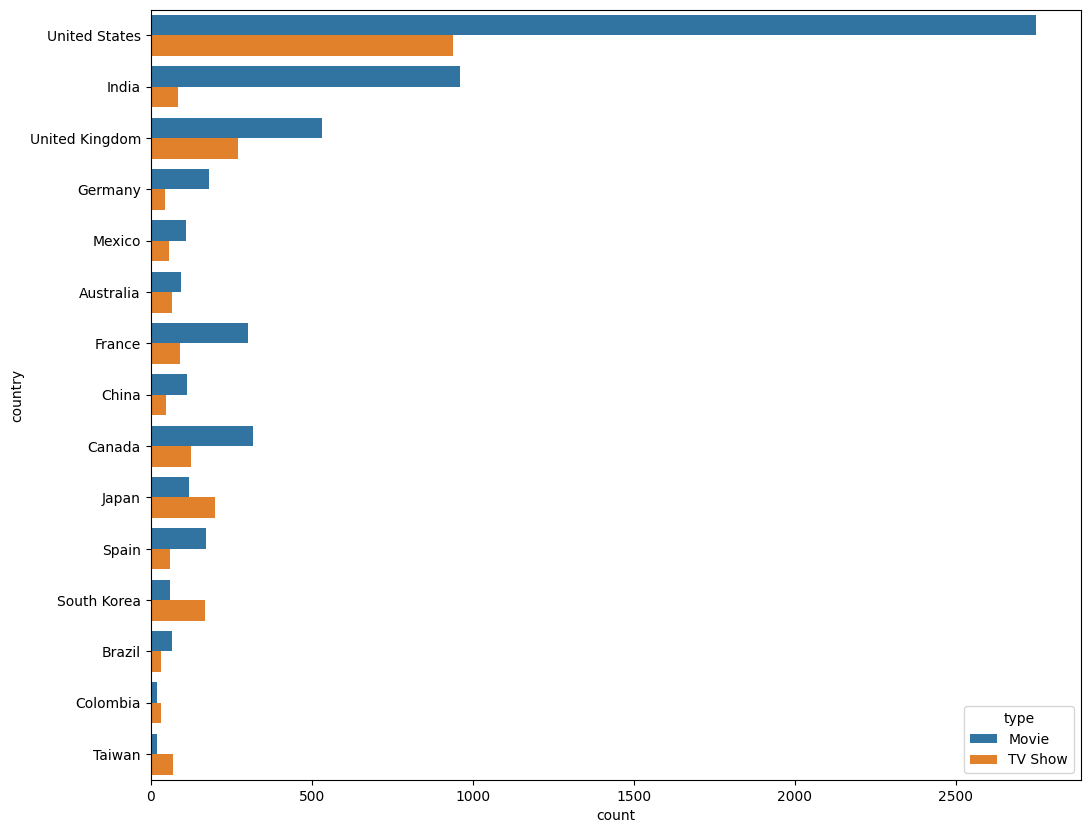

In [61]:
plt.figure(figsize=(12,10))
sns.countplot(data=type_country.loc[type_country['country'].isin(tycont1['country'])],y='country',hue='type')
plt.show()

### Most watched genre for movies and TV show ?

In [62]:
type_listed=df[['type','listed_in']]

In [63]:
type_listed['listed_in']=type_listed['listed_in'].str.split(', ')
type_listed=type_listed.explode('listed_in')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14684\1692633346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_listed['listed_in']=type_listed['listed_in'].str.split(', ')


In [64]:
print(type_listed['listed_in'].nunique())
type_listed['listed_in'].unique()

42


array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [65]:
type_listed=type_listed.value_counts().reset_index().rename(columns={0:"values"})

In [66]:
type_listed

,type,listed_in,values
0,Movie,International Movies,2752
1,Movie,Dramas,2427
2,Movie,Comedies,1674
3,TV Show,International TV Shows,1351
4,Movie,Documentaries,869
5,Movie,Action & Adventure,859
6,TV Show,TV Dramas,763
7,Movie,Independent Movies,756
8,Movie,Children & Family Movies,641
9,Movie,Romantic Movies,616


In [67]:
Movie_genre=type_listed.loc[type_listed['type']=='Movie'].reset_index(drop=True)
Movie_genre['Movie_percentage']=round(Movie_genre['values']*100/6131,2)
Movie_genre

,type,listed_in,values,Movie_percentage
0,Movie,International Movies,2752,44.89
1,Movie,Dramas,2427,39.59
2,Movie,Comedies,1674,27.30
3,Movie,Documentaries,869,14.17
4,Movie,Action & Adventure,859,14.01
5,Movie,Independent Movies,756,12.33
6,Movie,Children & Family Movies,641,10.46
7,Movie,Romantic Movies,616,10.05
8,Movie,Thrillers,577,9.41
9,Movie,Music & Musicals,375,6.12


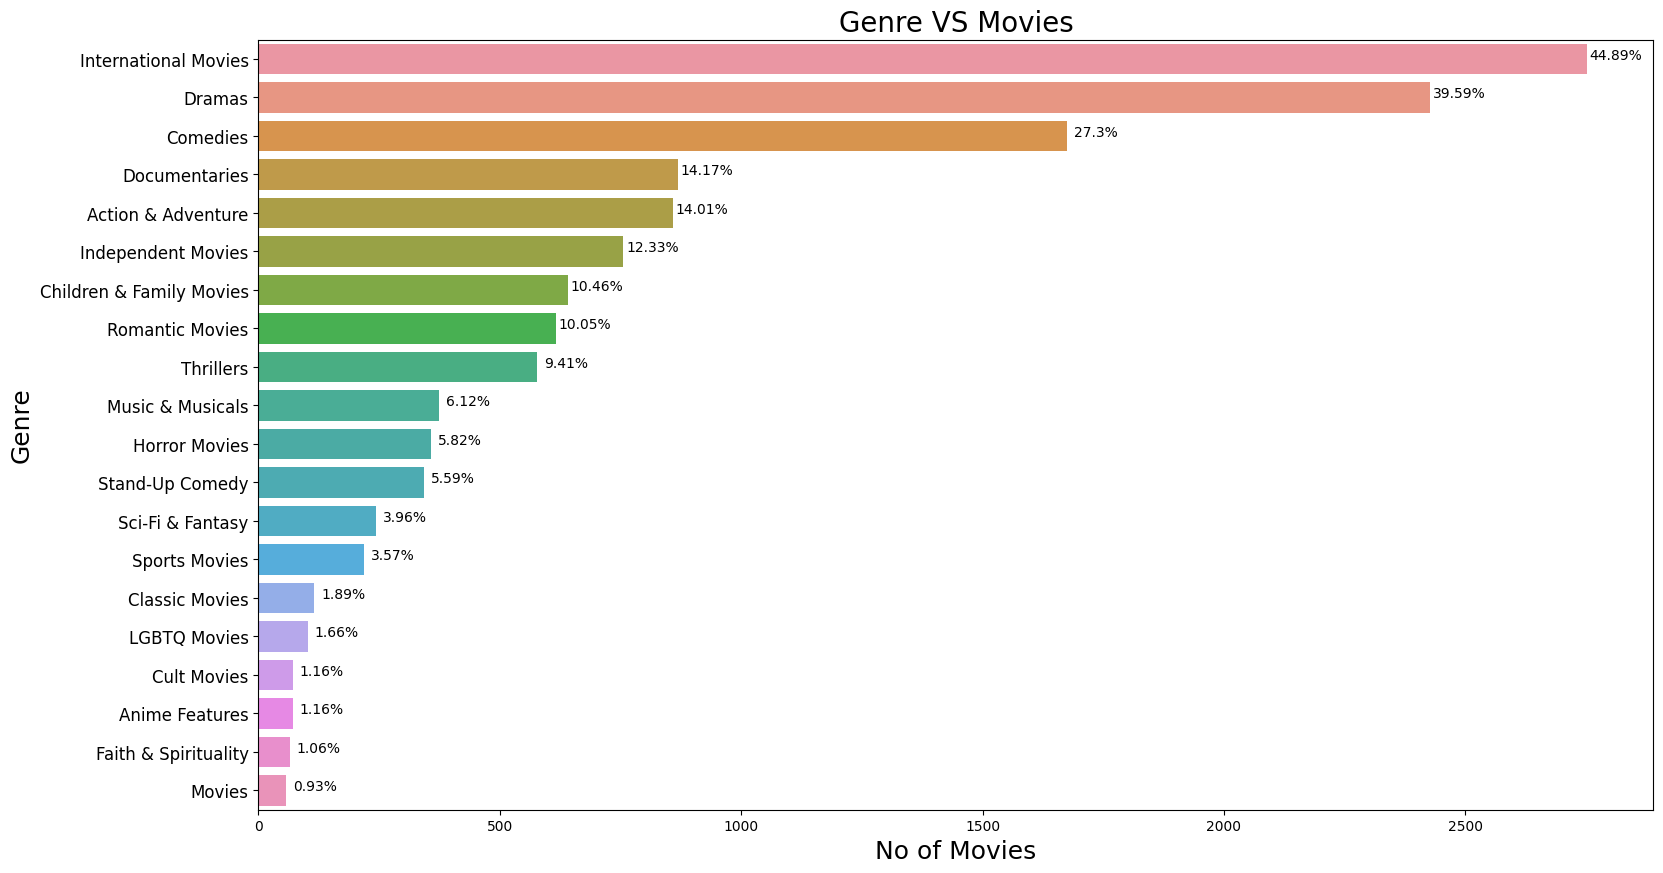

In [68]:
plt.figure(figsize=(18,10))
def addlabels(x,y,Z):
    for i in range(len(x)):
        plt.text(y=i, x=y[i]+60, s=f'{Z[i]}%', ha = 'center')
sns.barplot(data=Movie_genre,y='listed_in',x='values')
addlabels(Movie_genre['listed_in'],Movie_genre['values'],Movie_genre['Movie_percentage'])
plt.xlabel('No of Movies',fontsize=18)
plt.ylabel('Genre',fontsize=18)
plt.yticks(fontsize=12)
plt.title('Genre VS Movies',fontsize=20)
plt.show()

> **Insight3= Movies having genre Drama Comedies, documentaries Action and Adventure works for the netflix**

In [69]:
TVshow_genre=type_listed.loc[type_listed['type']=='TV Show'].reset_index(drop=True)
TVshow_genre['tvshow_percentage']=round(TVshow_genre['values']*100/2676,2)
TVshow_genre

,type,listed_in,values,tvshow_percentage
0,TV Show,International TV Shows,1351,50.49
1,TV Show,TV Dramas,763,28.51
2,TV Show,TV Comedies,581,21.71
3,TV Show,Crime TV Shows,470,17.56
4,TV Show,Kids' TV,451,16.85
5,TV Show,Docuseries,395,14.76
6,TV Show,Romantic TV Shows,370,13.83
7,TV Show,Reality TV,255,9.53
8,TV Show,British TV Shows,253,9.45
9,TV Show,Anime Series,176,6.58


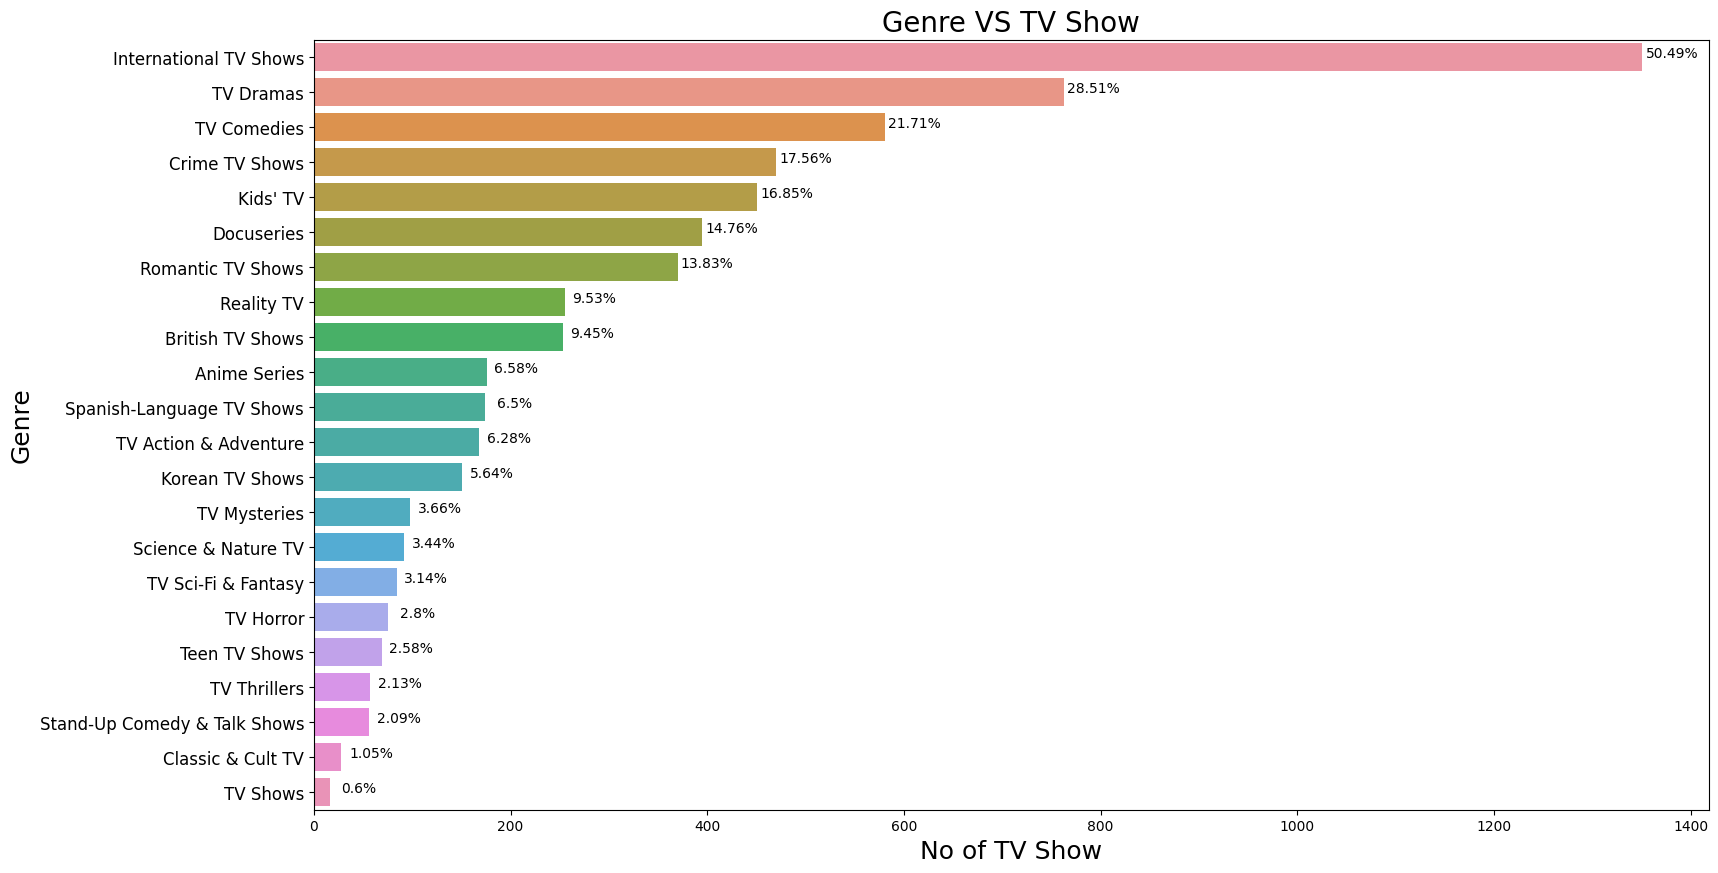

In [70]:
plt.figure(figsize=(18,10))
def addlabels(x,y,Z):
    for i in range(len(x)):
        plt.text(y=i, x=y[i]+30, s=f'{Z[i]}%', ha = 'center')
sns.barplot(data=TVshow_genre,y='listed_in',x='values')
addlabels(TVshow_genre['listed_in'],TVshow_genre['values'],TVshow_genre['tvshow_percentage'])
plt.xlabel('No of TV Show',fontsize=18)
plt.ylabel('Genre',fontsize=18)
plt.yticks(fontsize=12)
plt.title('Genre VS TV Show',fontsize=20)
plt.show()


> **Insight6= TV Show having genre Drama Comedies, crime and kids tv Show works the netflix**

### How does the Duration of A movie or Season no of a TV show on popularity ?

In [71]:
type_duration=df[['type','duration']]

In [72]:
type_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      8807 non-null   object
 1   duration  8807 non-null   object
dtypes: object(2)
memory usage: 137.7+ KB


In [73]:
type_duration['duration_value']=type_duration['duration'].apply(lambda x:str(x).split(" ")[0])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14684\893986083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_duration['duration_value']=type_duration['duration'].apply(lambda x:str(x).split(" ")[0])


In [74]:
type_duration['duration_value']=type_duration['duration_value'].astype(int)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14684\3730238322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_duration['duration_value']=type_duration['duration_value'].astype(int)


In [75]:
type_duration

,type,duration,duration_value
0,Movie,90 min,90
1,TV Show,2 Seasons,2
2,TV Show,1 Season,1
3,TV Show,1 Season,1
4,TV Show,2 Seasons,2
...,...,...,...
8802,Movie,158 min,158
8803,TV Show,2 Seasons,2
8804,Movie,88 min,88
8805,Movie,88 min,88


In [76]:
type_duration_movie=type_duration.loc[type_duration['type']=='Movie']

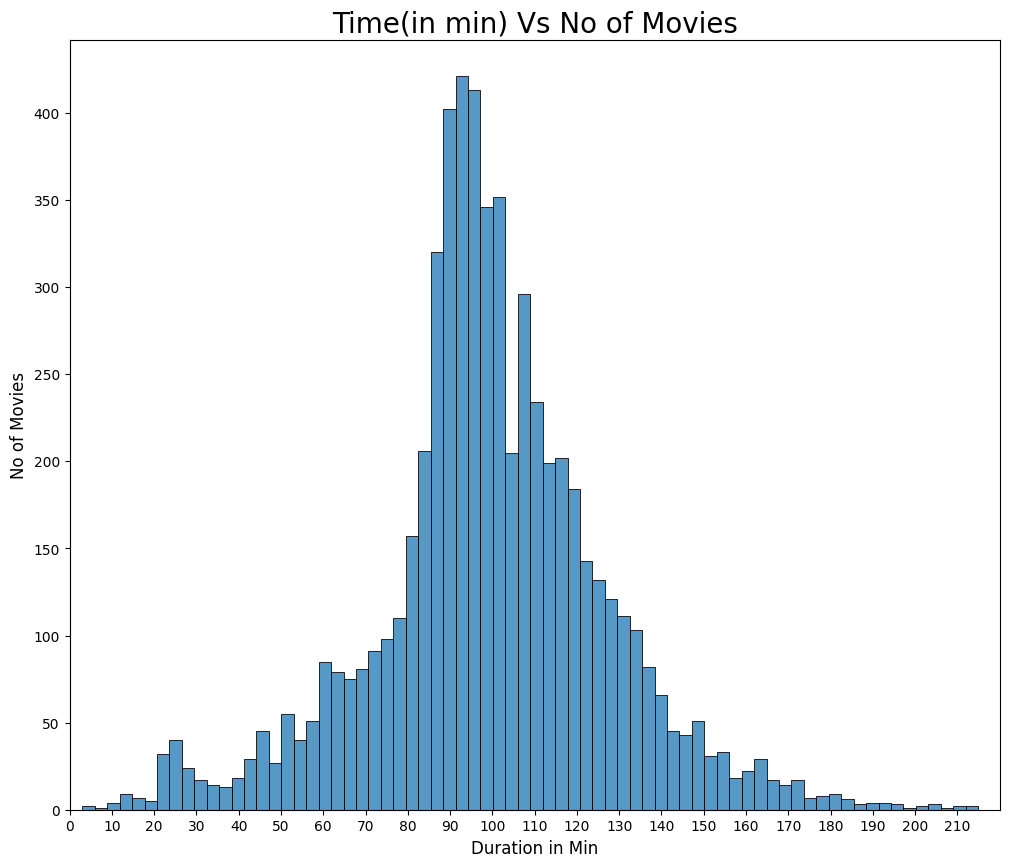

In [77]:
plt.figure(figsize=(12,10))
sns.histplot(data=type_duration_movie,x='duration_value')
plt.xticks(ticks=[y for y in range(0,220,10)],labels=[y for y in range(0,220,10)])
plt.xlim([0,220])
plt.xlabel('Duration in Min',fontsize=12)
plt.ylabel('No of Movies',fontsize=12)
plt.title('Time(in min) Vs No of Movies',fontsize=20)
plt.show()


In [78]:
type_duration_movie['m_category']=pd.cut(type_duration_movie['duration_value'],bins=[3,50,70,90,110,150,200,312],labels=['s1','s2','m1','m2','m3','l1','l2'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14684\524835041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_duration_movie['m_category']=pd.cut(type_duration_movie['duration_value'],bins=[3,50,70,90,110,150,200,312],labels=['s1','s2','m1','m2','m3','l1','l2'])


In [79]:
type_duration_movie['m_category'].value_counts()

m2    2343
m3    1550
m1    1240
s2     466
s1     286
l1     226
l2      19
Name: m_category, dtype: int64

Text(0.5, 1.0, 'Time(in min) Vs No of Movies')

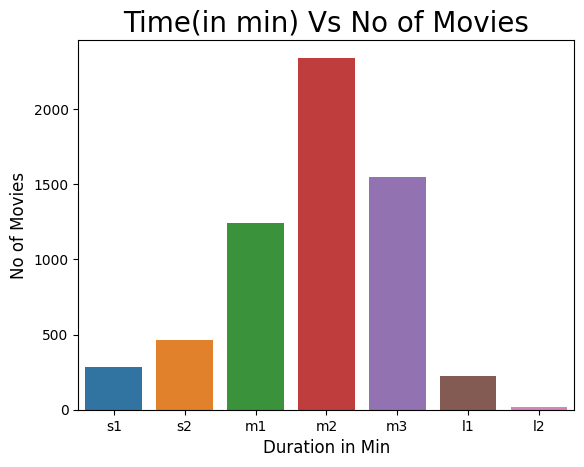

In [80]:
sns.countplot(x=type_duration_movie['m_category'])
plt.xlabel('Duration in Min',fontsize=12)
plt.ylabel('No of Movies',fontsize=12)
plt.title('Time(in min) Vs No of Movies',fontsize=20)

In [81]:
type_duration_tvshow=type_duration.loc[type_duration['type']=='TV Show']

<Axes: xlabel='duration_value', ylabel='count'>

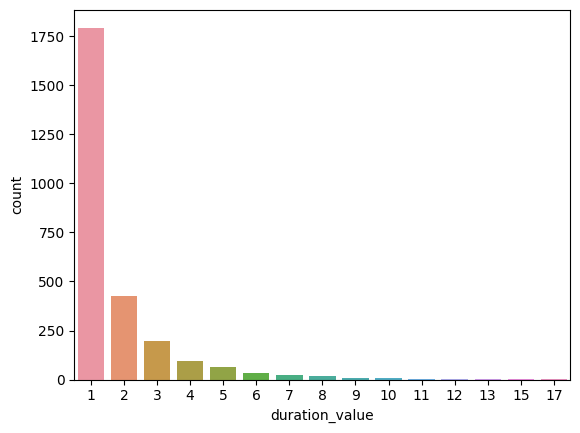

In [82]:
sns.countplot(x=type_duration_tvshow['duration_value'])

> **Insight7= Movies having length between 90 to 110 min works for the netflix**

###  Preferance of Cast with most popular director ?

In [83]:
df1=df[['director','cast']]

In [84]:
df1['director']=df1['director'].str.split(', ')
df1=df1.explode('director')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14684\3563654388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['director']=df1['director'].str.split(', ')


In [85]:
df1['cast']=df1['cast'].str.split(', ')
df1=df1.explode('cast')

In [86]:
df1

,director,cast
0,Kirsten Johnson,NaN
1,NaN,Ama Qamata
1,NaN,Khosi Ngema
1,NaN,Gail Mabalane
1,NaN,Thabang Molaba
...,...,...
8806,Mozez Singh,Manish Chaudhary
8806,Mozez Singh,Meghna Malik
8806,Mozez Singh,Malkeet Rauni
8806,Mozez Singh,Anita Shabdish


In [87]:
df1=df1.dropna().reset_index(drop=True)

In [88]:
df1

,director,cast
0,Julien Leclercq,Sami Bouajila
1,Julien Leclercq,Tracy Gotoas
2,Julien Leclercq,Samuel Jouy
3,Julien Leclercq,Nabiha Akkari
4,Julien Leclercq,Sofia Lesaffre
...,...,...
51186,Mozez Singh,Manish Chaudhary
51187,Mozez Singh,Meghna Malik
51188,Mozez Singh,Malkeet Rauni
51189,Mozez Singh,Anita Shabdish


In [89]:
new_df=df1.value_counts().reset_index().rename(columns={0:'values'})
new_df

,director,cast,values
0,Rajiv Chilaka,Rajesh Kava,19
1,Rajiv Chilaka,Julie Tejwani,19
2,Rajiv Chilaka,Rupa Bhimani,18
3,Rajiv Chilaka,Jigna Bhardwaj,18
4,Rajiv Chilaka,Vatsal Dubey,16
...,...,...,...
48181,Huang Jianming,Anthony Padilla,1
48182,Huang Jianming,Chevy Chase,1
48183,Huang Jianming,Ian Hecox,1
48184,Huang Jianming,Jenn McAllister,1


In [90]:
newdf1=new_df.loc[new_df['values']>4] # we will extract those director and cast pairs having more than 4 movies together

In [91]:
newdf1

,director,cast,values
0,Rajiv Chilaka,Rajesh Kava,19
1,Rajiv Chilaka,Julie Tejwani,19
2,Rajiv Chilaka,Rupa Bhimani,18
3,Rajiv Chilaka,Jigna Bhardwaj,18
4,Rajiv Chilaka,Vatsal Dubey,16
...,...,...,...
72,Ishi Rudell,Tabitha St. Germain,5
73,Ishi Rudell,Tara Strong,5
74,Shigeaki Kubo,Yuki Yamada,5
75,Thierry Donard,Wille Lindberg,5


In [92]:
cast_preference=newdf1.groupby('director')['cast'].apply(lambda x: x.str.cat(sep=', ')).reset_index()
cast_preference

,director,cast
0,Alex Woo,"Maisie Benson, Kerry Gudjohnsen, Paul Killam"
1,Cathy Garcia-Molina,"Joross Gamboa, John Lloyd Cruz"
2,David Dhawan,Anupam Kher
3,Fernando Ayllón,Ricardo Quevedo
4,Hakan Algül,"Ata Demirer, Salih Kalyon"
5,Ishi Rudell,"Ashleigh Ball, Andrea Libman, Rebecca Shoichet..."
6,Jesse V. Johnson,Scott Adkins
7,Joey So,"Joseph May, Keith Wickham"
8,John Paul Tremblay,"John Paul Tremblay, Pat Roach, Mike Smith, Rob..."
9,Khaled Marei,Ahmed Helmy


### Analyze of Movie and tv show released per year

In [93]:
type_releaseyear=pd.crosstab(df['release_year'],df['type'])
type_releaseyear

type,Movie,TV Show
release_year,,
1925,0,1
1942,2,0
1943,3,0
1944,3,0
1945,3,1
...,...,...
2017,767,265
2018,767,380
2019,633,397


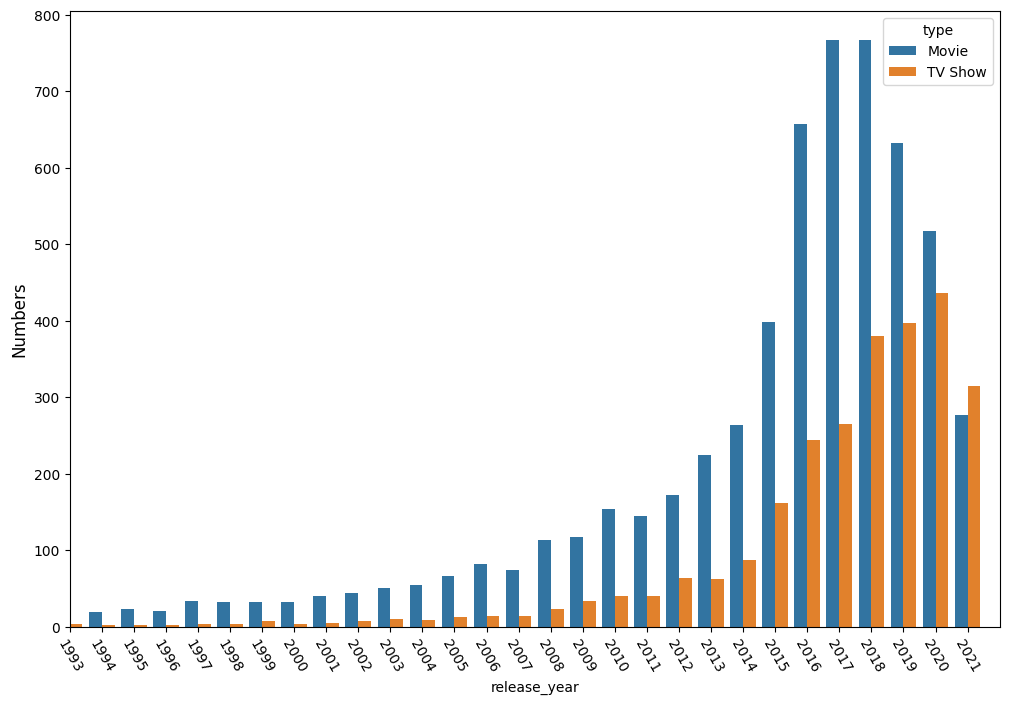

In [94]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='release_year',hue='type')
plt.xticks(rotation=300)
#plt.xlim(left=1980,right=2022)
plt.gca().set_xlim([45, 74])
plt.ylabel('Numbers',fontsize=12)
plt.show()

### Best time to launch the Shows

In [95]:
pd.crosstab(df['date_added'].dt.year,df['type']).reset_index().sort_values(by=['Movie'],ascending=False)

type,date_added,Movie,TV Show
11,2019.0,1424,592
12,2020.0,1284,595
10,2018.0,1237,412
13,2021.0,993,505
9,2017.0,839,349
8,2016.0,253,176
7,2015.0,56,26
6,2014.0,19,5
3,2011.0,13,0
5,2013.0,6,5


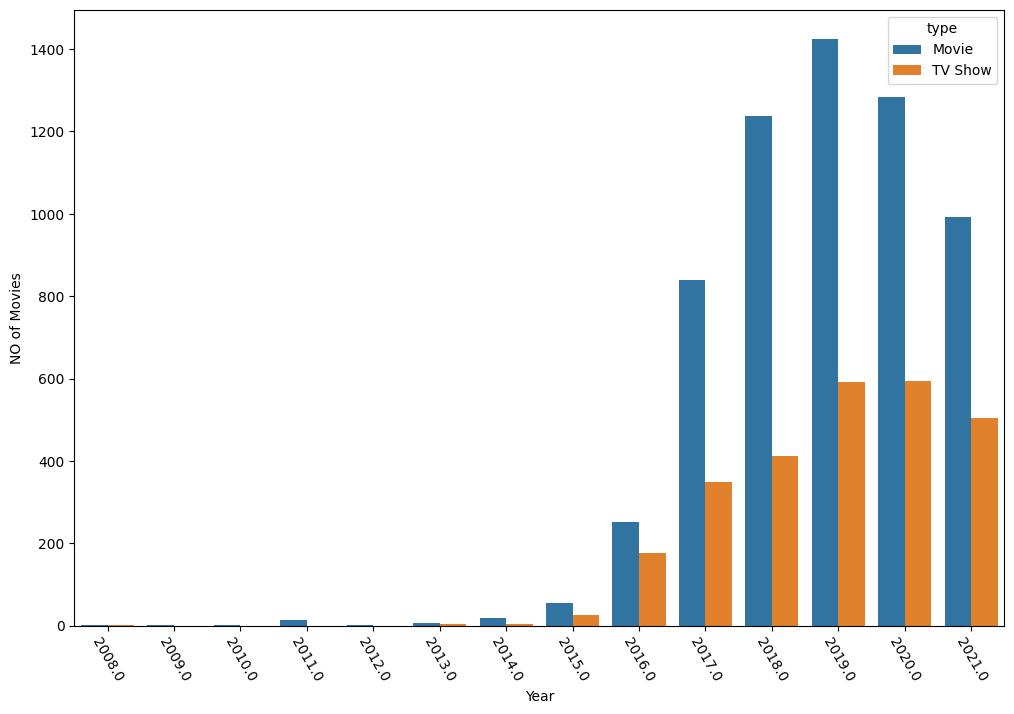

In [96]:
plt.figure(figsize=(12,8))
ax5=sns.countplot(x=df['date_added'].dt.year,hue=df['type'])
ax5.set(xlabel='Year',ylabel='NO of Movies')
plt.xticks(rotation=300)
plt.show()

In [97]:
pd.crosstab(df['date_added'].dt.month, df['type']).reset_index(drop=False).sort_values(by=['Movie'],ascending=False)

type,date_added,Movie,TV Show
6,7.0,565,262
3,4.0,550,214
11,12.0,547,266
0,1.0,546,192
9,10.0,545,215
2,3.0,529,213
7,8.0,519,236
8,9.0,519,251
10,11.0,498,207
5,6.0,492,236


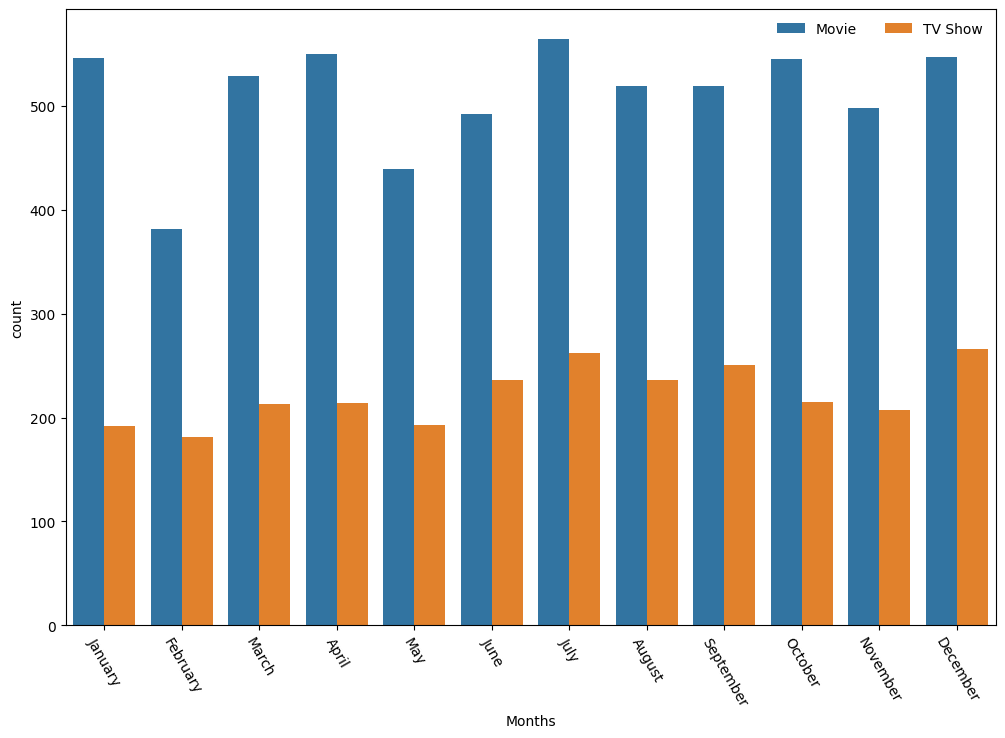

In [98]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['date_added'].dt.month,hue=df['type'])
plt.xticks(rotation=300)
plt.xlabel('Months')
plt.xticks(ticks=[x for x in range(0,12)]
    ,labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.legend(frameon=False,ncol=2)
plt.show()

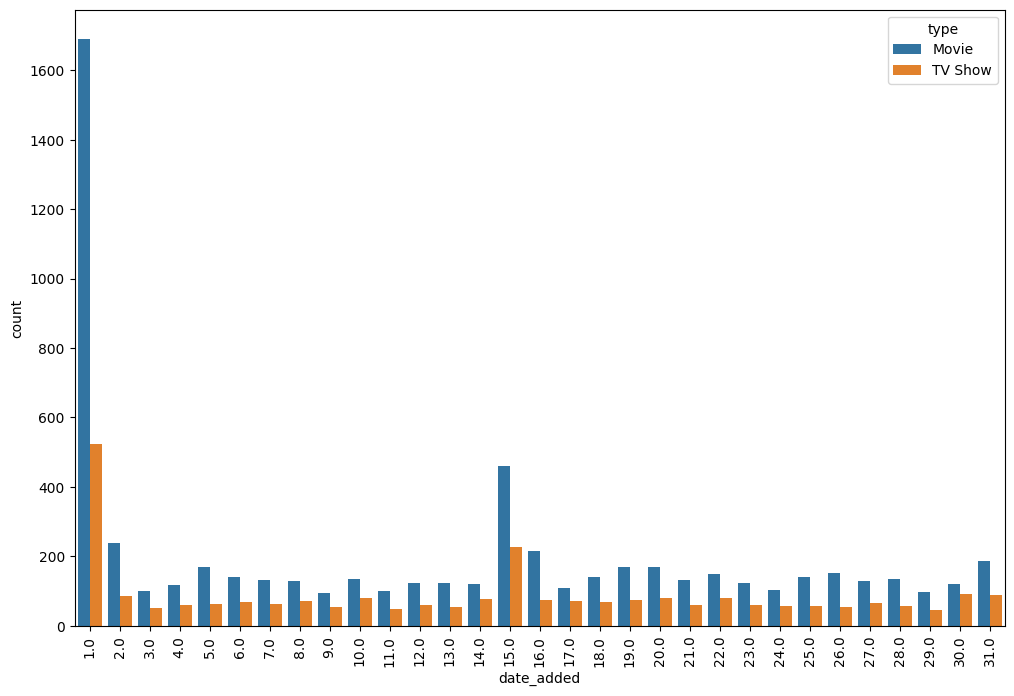

In [99]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['date_added'].dt.day,hue=df['type'])
plt.xticks(rotation=90)
plt.show()

> Best Year to launch a Movie= 2018,2019,2022, month=July,dec,april day=1,15
for tv shows 2019,2020, month= almost same for every month, day=1,15


### Analyzing the different content available in countries

In [100]:
country_listedin=df[['show_id','type','country','listed_in']]

In [101]:
country_listedin['country']=country_listedin['country'].str.split(', ')
country_listedin=country_listedin.explode('country')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14684\1871266629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_listedin['country']=country_listedin['country'].str.split(', ')


In [102]:
country_listedin['listed_in']=country_listedin['listed_in'].str.split(', ')
country_listedin=country_listedin.explode('listed_in')

In [103]:
country_listedin.dropna(subset=['country','listed_in'],inplace=True)

In [104]:
country_listedin

,show_id,type,country,listed_in
0,s1,Movie,United States,Documentaries
1,s2,TV Show,South Africa,International TV Shows
1,s2,TV Show,South Africa,TV Dramas
1,s2,TV Show,South Africa,TV Mysteries
4,s5,TV Show,India,International TV Shows
...,...,...,...,...
8805,s8806,Movie,United States,Children & Family Movies
8805,s8806,Movie,United States,Comedies
8806,s8807,Movie,India,Dramas
8806,s8807,Movie,India,International Movies


In [105]:
country_listedin_movies=country_listedin.loc[country_listedin['type']=='Movie'].groupby(['country','listed_in']).size().reset_index().rename(columns={0:'values'}).sort_values(by='values',ascending=False).reset_index(drop=True)

In [106]:
country_listedin_tvshow=country_listedin.loc[country_listedin['type']=='TV Show'].groupby(['country','listed_in']).size().reset_index().rename(columns={0:'values'}).sort_values(by='values',ascending=False).reset_index(drop=True)

In [107]:
country_listedin_movies

,country,listed_in,values
0,India,International Movies,864
1,United States,Dramas,835
2,United States,Comedies,680
3,India,Dramas,662
4,United States,Documentaries,511
...,...,...,...
898,Malta,Dramas,1
899,Malaysia,Independent Movies,1
900,Malaysia,Children & Family Movies,1
901,Malawi,Independent Movies,1


In [108]:
top_country_movie['country']

0      United States
1              India
2     United Kingdom
3             Canada
4             France
5            Germany
6              Spain
7              Japan
8              China
9             Mexico
10             Egypt
11         Hong Kong
12         Australia
13           Nigeria
14         Indonesia
Name: country, dtype: object

In [109]:
top_movie_genre=Movie_genre['listed_in'].head(3)
top_movie_genre

0    International Movies
1                  Dramas
2                Comedies
Name: listed_in, dtype: object

In [110]:
co_li_mo_top=country_listedin_movies.loc[(country_listedin_movies['country'].isin(top_country_movie['country']))&
                                         (country_listedin_movies['listed_in'].isin(top_movie_genre))]
co_li_mo_top

,country,listed_in,values
0,India,International Movies,864
1,United States,Dramas,835
2,United States,Comedies,680
3,India,Dramas,662
8,India,Comedies,323
12,France,International Movies,207
14,United Kingdom,Dramas,196
16,United Kingdom,International Movies,168
18,France,Dramas,167
19,United States,International Movies,166


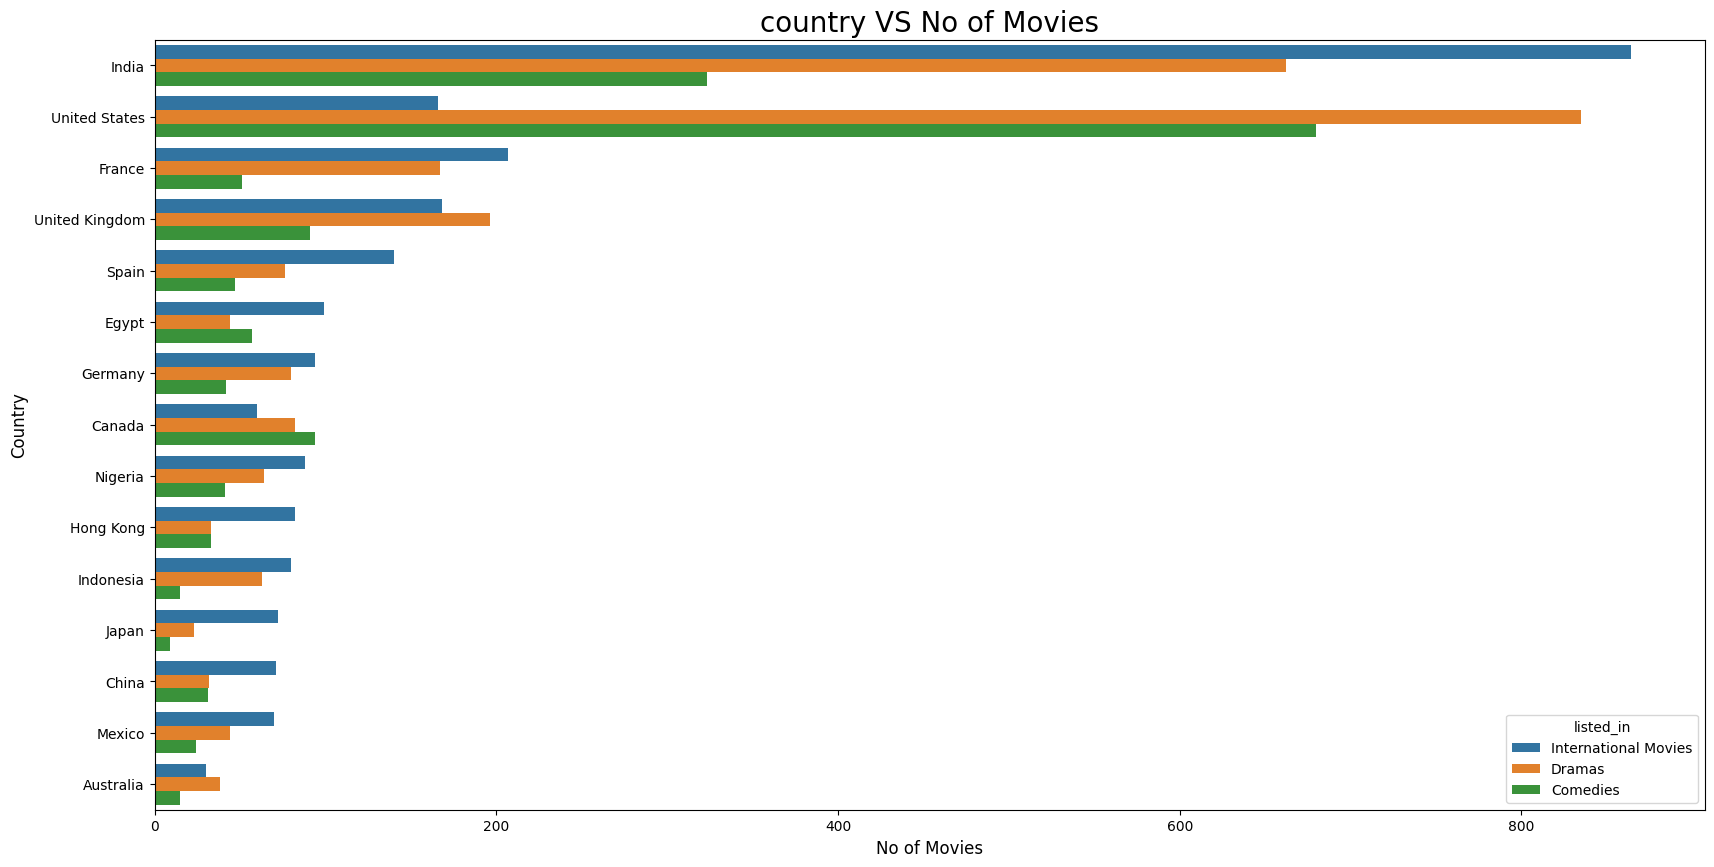

In [111]:
plt.figure(figsize=(20,10))
sns.barplot(data=co_li_mo_top,y='country',x='values',hue='listed_in')
plt.xlabel('No of Movies',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('country VS No of Movies',fontsize=20)
plt.show()

In [112]:
top_show_genre=TVshow_genre['listed_in'].head(3)
top_show_genre

0    International TV Shows
1                 TV Dramas
2               TV Comedies
Name: listed_in, dtype: object

In [113]:
co_li_tv_top=country_listedin_tvshow.loc[(country_listedin_tvshow['country'].isin(tycont1['country']))&
                                         (country_listedin_tvshow['listed_in'].isin(top_show_genre))]
co_li_tv_top

,country,listed_in,values
0,United States,TV Comedies,258
1,United States,TV Dramas,232
5,South Korea,International TV Shows,152
6,Japan,International TV Shows,151
10,United Kingdom,International TV Shows,128
15,United States,International TV Shows,74
16,Taiwan,International TV Shows,70
17,India,International TV Shows,66
20,Spain,International TV Shows,54
27,United Kingdom,TV Comedies,44


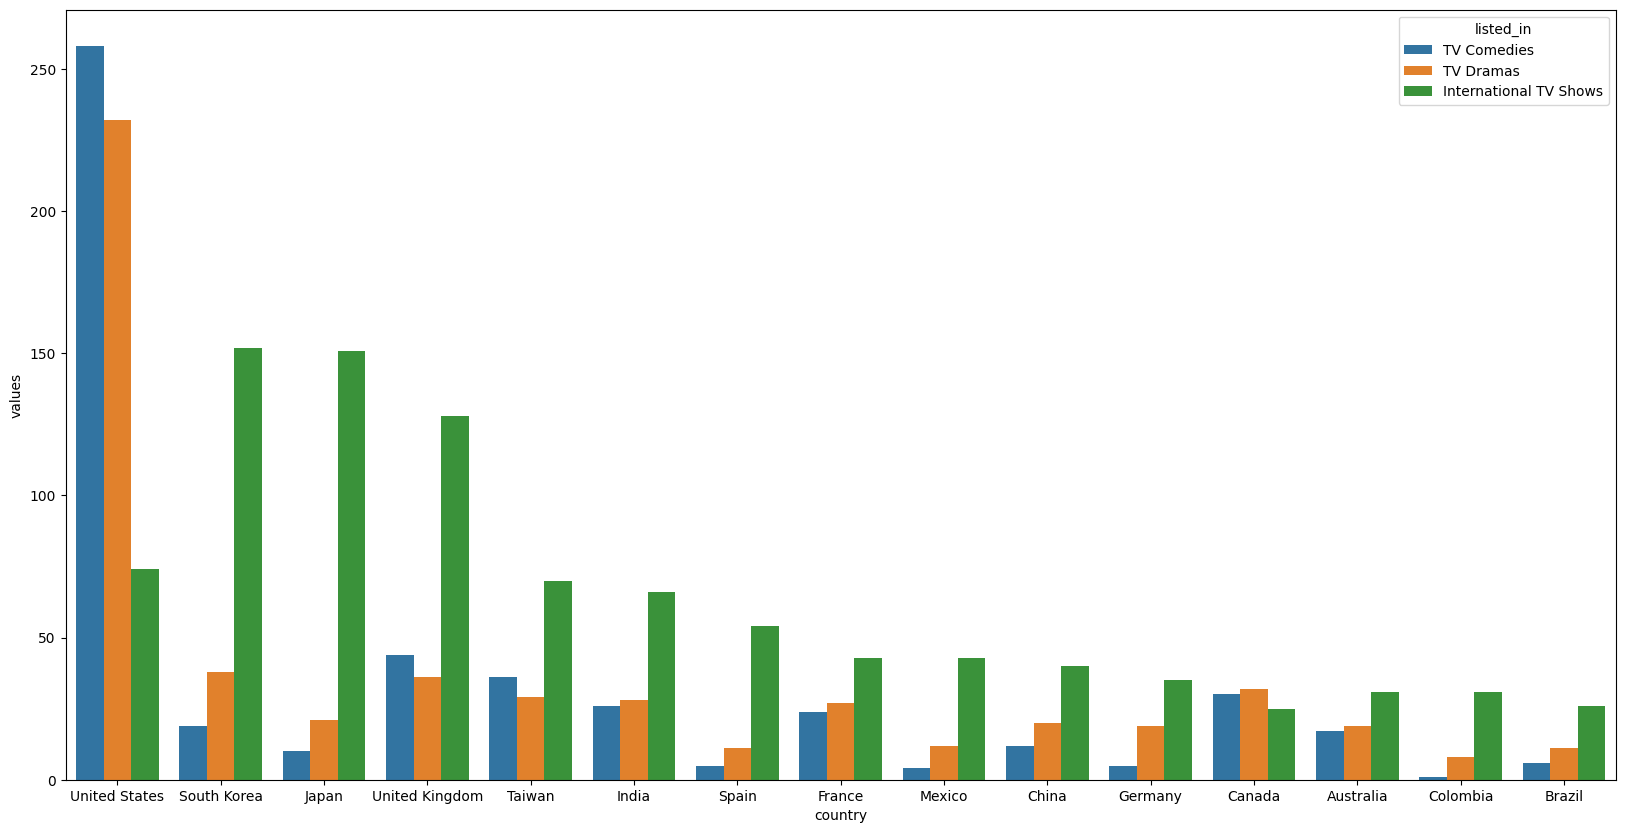

In [114]:
plt.figure(figsize=(20,10))
sns.barplot(data=co_li_tv_top,x='country',y='values',hue='listed_in')
plt.xticks(rotation=0)
plt.show()

### Analyzation of Movie relased with date added

<Axes: xlabel='date_added', ylabel='release_year'>

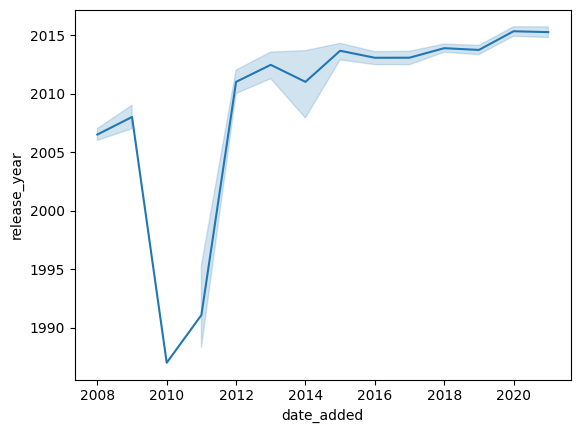

In [115]:
sns.lineplot(y=df['release_year'],x=df['date_added'].dt.year)

### Analyzation of top 3 genre popularity with time

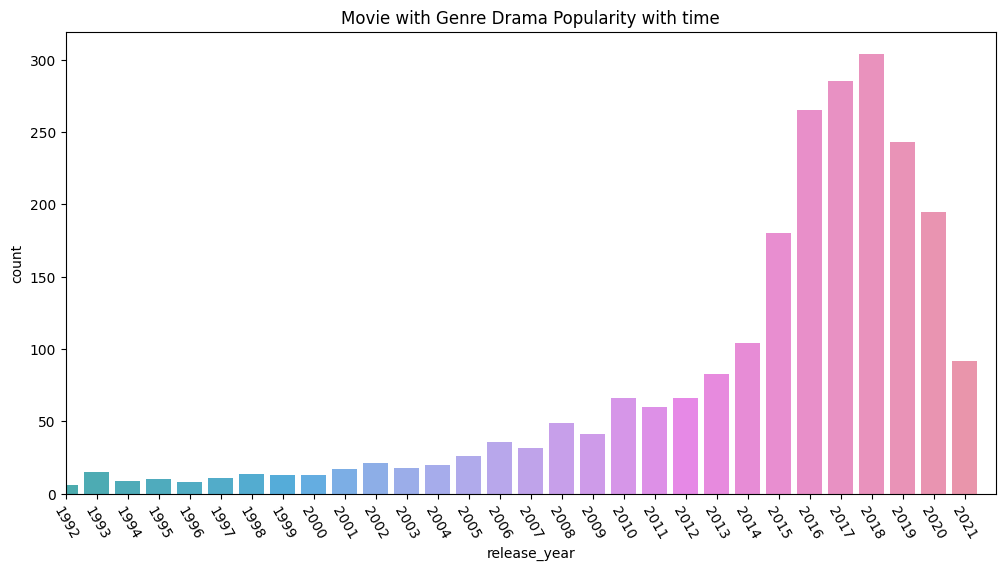

In [116]:
plt.figure(figsize=(12,6))
sns.countplot(data=df.loc[(df['type']=='Movie')&(df['listed_in'].str.contains('Dramas'))],x='release_year')
plt.gca().set_xlim([35, 65])
plt.xticks(rotation=300)

plt.title('Movie with Genre Drama Popularity with time')
plt.show()

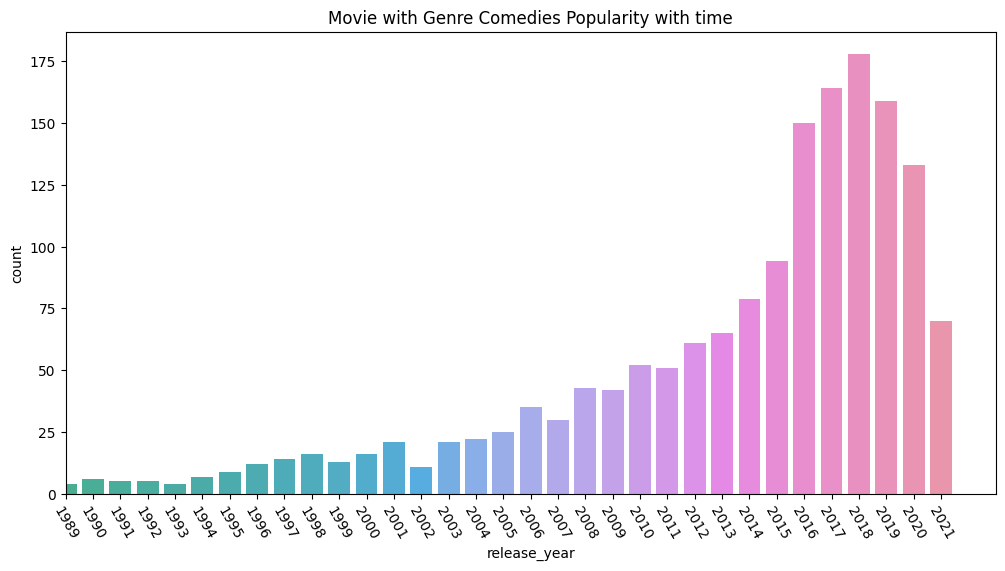

In [117]:
plt.figure(figsize=(12,6))
sns.countplot(data=df.loc[(df['type']=='Movie')&(df['listed_in'].str.contains('Comedies'))],x='release_year')
plt.gca().set_xlim([25, 59])
plt.xticks(rotation=300)
plt.title('Movie with Genre Comedies Popularity with time')
plt.show()

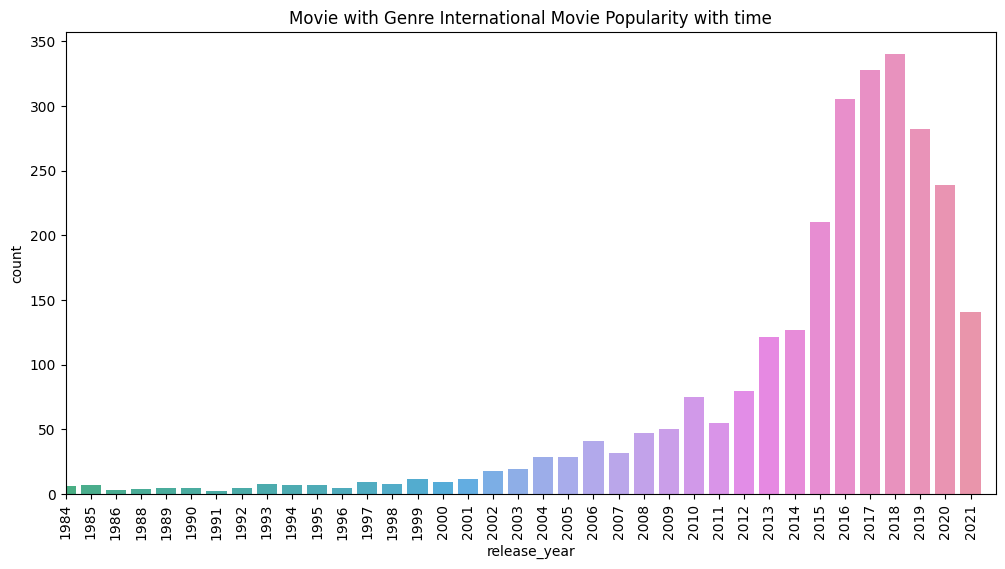

In [118]:
plt.figure(figsize=(12,6))
sns.countplot(data=df.loc[(df['type']=='Movie')&(df['listed_in'].str.contains('International Movies'))],x='release_year')
plt.gca().set_xlim([25, 62])
plt.xticks(rotation=90)
plt.title('Movie with Genre International Movie Popularity with time')
plt.show()